# Project: Oil Well Location (Machine Learning)

## Introduction

For this project, we are working for the mining company OilyGiant. Our task is to find the best location for a new well between three options.

For this task, we will build a model and use the predictions for total profit and risks (with a threshold of 2.5% max for losses) to determine the best option for well location. Our target will be using the `product` feature, which represents volume of reserves in a well (by thousand barrels) from the available datasets. The target is numerical, so we'll be executing a regression task.

After looking over the data, we'll run through brief exploratory data analysis before testing each of the datasets with our regression model in order to help us make a recommendation to the company.

## Data overview

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Import datasets
df_region_0 = pd.read_csv('datasets/geo_data_0.csv')
df_region_1 = pd.read_csv('datasets/geo_data_1.csv')
df_region_2 = pd.read_csv('datasets/geo_data_2.csv')

# Store datasets in a list to be used for iterating over
regions = [df_region_0, df_region_1, df_region_2]

### Study the data

In [3]:
for region in regions:
    display(region.head(10))

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [4]:
for region in regions:
    print(region.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column  

In [5]:
for region in regions:
    display(region.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


Upon initial examination of the data, everything looks good so far. We will likely have little preprocessing to worry about.

## Data preprocessing

In [6]:
# Find missing values
for region in regions:
    print(region.isnull().sum())

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64
id         0
f0         0
f1         0
f2         0
product    0
dtype: int64


In [7]:
# Find duplicate values
for region in regions:
    print(region.duplicated().sum())

0
0
0


In [8]:
# Find duplicate ids
for region in regions:
    print(region['id'].duplicated().sum())

10
4
4


Aside from no missing values or duplicated rows, we find duplicate ids within each region's dataset. But as the observations themselves in each row are still unique, the data is still valuable to us, so we will not drop rows due to duplicate ids.

In [9]:
# Fix data
for region in regions:
    region.drop(columns='id', inplace=True)
    region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1       100000 non-null  float64
 2   f2       100000 non-null  float64
 3   product  100000 non-null  float64
dtypes: float64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   f0       100000 non-null  float64
 1   f1 

As the `id` feature is the outlier data type among the rest of each dataset, we drop this column so that nothing interferes with the training and testing to follow where we're working purely with floating points for the rest of the data.

## Data Analysis

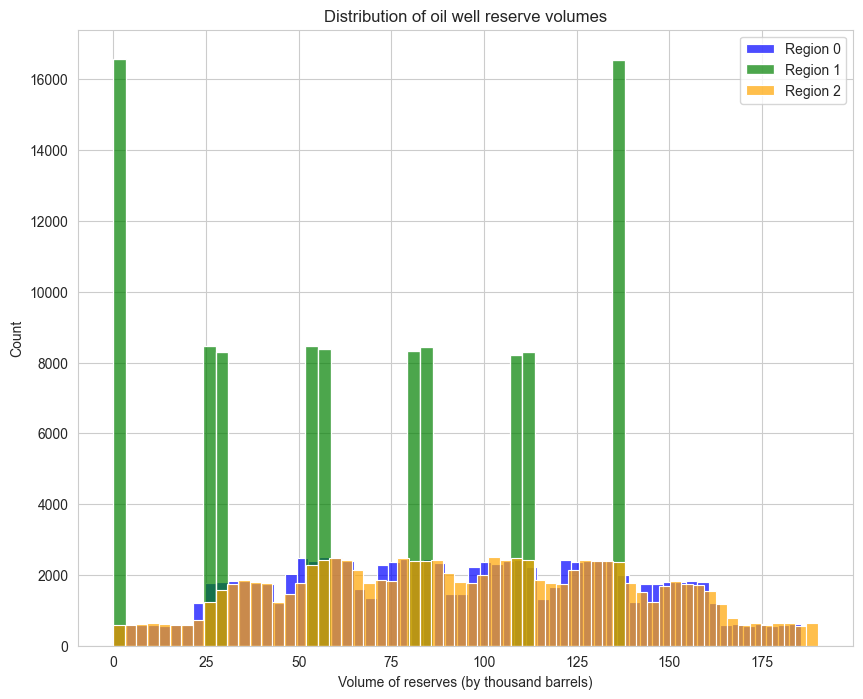

In [31]:
sns.set_style('whitegrid')
colors = ['blue', 'green', 'orange']
plt.figure(figsize=(10,8))
for i, region in enumerate(regions):
    sns.histplot(
        data=region,
        x='product',
        alpha=0.7,
        color=colors[i]
    )
plt.grid(True)
plt.title('Distribution of oil well reserve volumes')
plt.xlabel('Volume of reserves (by thousand barrels)')
plt.legend(['Region 0', 'Region 1', 'Region 2'])
plt.show()

We visualize the distribution of volume of reserves across each of the regions. Regions 0 and 2 appear to have the most similar distribution of data in common as opposed to Region 1.

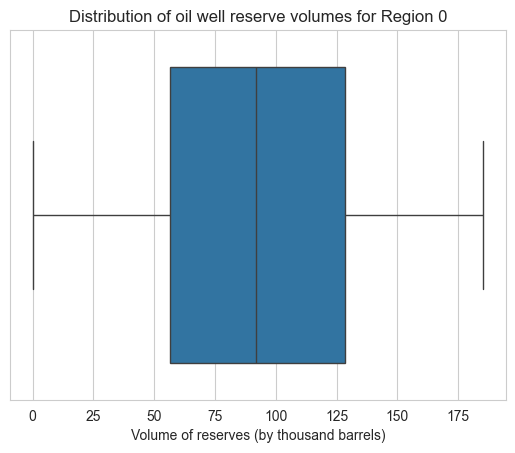

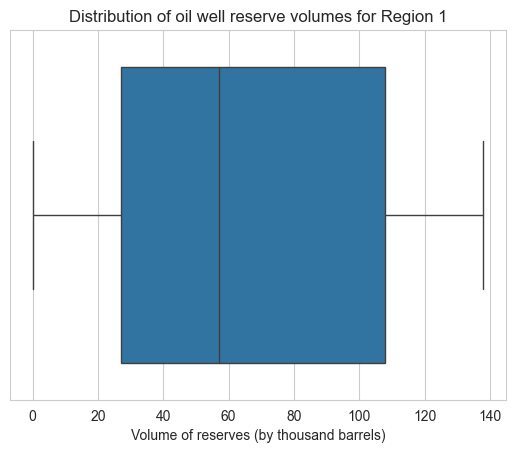

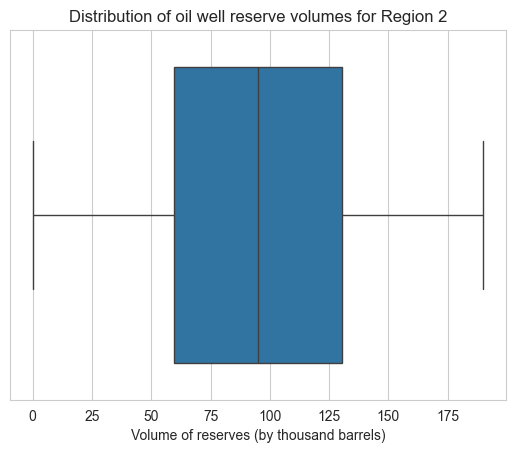

In [11]:
for i, region in enumerate(regions):
    sns.boxplot(
        data=region,
        x='product'
    )
    plt.title(f'Distribution of oil well reserve volumes for Region {i}')
    plt.xlabel('Volume of reserves (by thousand barrels)')
    plt.show()

We also visualize box plots to compare the distribution of volume of reserves across each of the regions. All 3 regions have similar minimum and maximum values. Again, we see similarities with Region 0 and 2's distributions, including their interquartile range and median. Region 1 has a larger interquartile range and a lower median as compared to the other two regions.

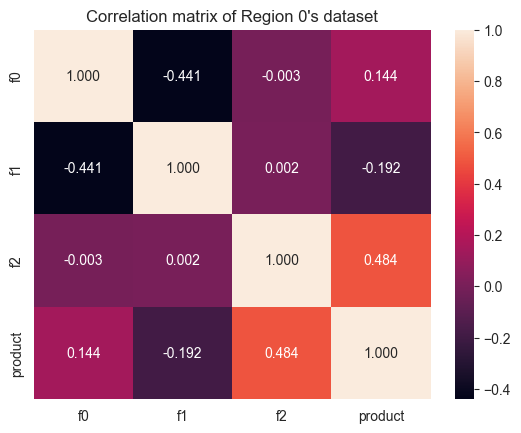

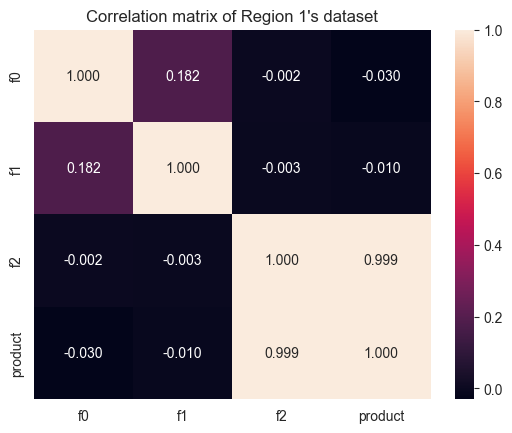

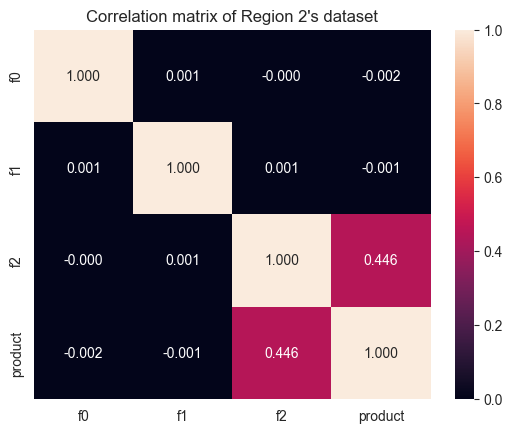

In [12]:
for i, region in enumerate(regions):
    corr_matrix = region.corr()
    sns.heatmap(
        corr_matrix,
        fmt='.3f',
        annot=True,
    )
    plt.title(f'Correlation matrix of Region {i}\'s dataset')
    plt.show()

Finally, we visualize each region's datasets via correlation matrix. Again, Regions 0 and 2 show similar results, but overall the matrices don't indicate any positive correlations worth further note or inspection.

## Machine learning

### Train and test the model per region

In [13]:
state = np.random.RandomState(12345)

def model_training(df):
    # Split data into training and validation sets at a 75:25 ratio
    features = df.drop(['product'], axis=1)
    target = df['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.25, random_state=state)

    # Train the model and make predictions 
    # Save predictions and correct answers
    model = LinearRegression()
    model.fit(features_train, target_train)
    
    pred_valid = model.predict(features_valid)
    
    # Print the average volume of predicted reserves and model RMSE
    avg_vol_pred = round(pred_valid.mean(), 2)
    print(f'Average volume of predicted reserves: {avg_vol_pred}')
    
    rmse = round(mean_squared_error(target_valid, pred_valid) ** 0.5, 2)
    print(f'RMSE: {rmse}')

    return target_valid, pred_valid, avg_vol_pred, rmse

In [14]:
# Region 0
target_valid_r0, pred_valid_r0, avg_vol_pred_r0, rmse_r0 = model_training(df_region_0)

Average volume of predicted reserves: 92.59
RMSE: 37.58


In [15]:
# Region 1
target_valid_r1, pred_valid_r1, avg_vol_pred_r1, rmse_r1 = model_training(df_region_1)

Average volume of predicted reserves: 68.77
RMSE: 0.89


In [16]:
# Region 2
target_valid_r2, pred_valid_r2, avg_vol_pred_r2, rmse_r2 = model_training(df_region_2)

Average volume of predicted reserves: 95.09
RMSE: 39.96


We create a function for model training to split data, train our model using Linear Regression, and return the data that we need. For each region, we print the average volume of predicted reserves as well as the RMSE value.

Regions 0 and 2 show similar outcomes with high average volumes of predicted reserves, but also high predicted RMSE values. In general, we want MSE/RMSE metrics to be as low as possible. Region 1 shows the lowest RMSE value to date.

### Prepare data for profit calculation

In [26]:
# Store all key values for calculations in separate values
N_OF_WELLS = 200
TOTAL_BUDGET = 1e8
BUDGET_PER_WELL = TOTAL_BUDGET / N_OF_WELLS
N_OF_RESERVES = 1000
REVENUE_PER_BARREL = 4.5
REVENUE_PER_UNIT_OF_PRODUCT = REVENUE_PER_BARREL * N_OF_RESERVES
N_OF_SAMPLES = 500
RISK_OF_LOSS_MAX = 2.5

# Calculate the volume of reserves sufficient for developing a new well w/out loses
volume_of_reserves = BUDGET_PER_WELL / REVENUE_PER_UNIT_OF_PRODUCT
print(f'Volume of reserves to be profitable: {volume_of_reserves:.2f}')

# Compare the obtained value w/ the average volume of reserves in each region
print(f'Average volume of predicted reserves for Region 0: {avg_vol_pred_r0}')
print(f'Average volume of predicted reserves for Region 1: {avg_vol_pred_r1}')
print(f'Average volume of predicted reserves for Region 2: {avg_vol_pred_r2}')

Volume of reserves to be profitable: 111.11
Average volume of predicted reserves for Region 0: 92.59
Average volume of predicted reserves for Region 1: 68.77
Average volume of predicted reserves for Region 2: 95.09


Next, we prepare additional data for profit calculation, calculate the volume of reserves in order to be profitable, and finally compare that number to the predicted volume of reserves per region.

Based on our calcuations, we see that Regions 0 and 2 come closest to the target volume of reserves for profitability (approx. 111,000), while the average volume prediction is lowest for Region 1.

### Function for profit calculation

In [18]:
def profit_calculation(target, predictions):
    target = pd.Series(target).reset_index(drop=True)
    predictions = pd.Series(predictions).reset_index(drop=True)
    
    # Get wells with the highest predictions values
    top_wells = predictions.sort_values(ascending=False)[:N_OF_WELLS].index
    
    # Calculate sum of product volume from top wells
    total_reserves = target.loc[top_wells].sum()

    # Calculate revenue
    revenue = total_reserves * REVENUE_PER_UNIT_OF_PRODUCT

    # Calculate profit    
    profit = revenue - TOTAL_BUDGET

    return round(profit, 2)

In [19]:
# Region 0
profit_calculation(target_valid_r0, pred_valid_r0)

33208260.43

In [20]:
# Region 1
profit_calculation(target_valid_r1, pred_valid_r1)

24150866.97

In [21]:
# Region 2
profit_calculation(target_valid_r2, pred_valid_r2)

25399159.46

Next, we create a function for calculating profit per region.

Based on our calculations, Region 0 has the highest predicted profit based on its volumes of reserves ($33.2 million). Without checking for risk of losses, Region 0 would be our current recommendation for new oil well development. Based on the remaining order of predicted profits, Region 2, and then Region 1, would follow.


### Calculate risks and profit (per region)

In [22]:
state = np.random.RandomState(12345)

def bootstrap_analysis(target, predictions):
    target = pd.Series(target).reset_index(drop=True)
    predictions = pd.Series(predictions).reset_index(drop=True)
    
    values = []
    
    # Calculate profit to determine average profit for n of wells
    # to calculate loss via 1000 repetitions
    for i in range(1000):
        target_subsample = target.sample(n=N_OF_SAMPLES, replace=True, random_state=state)
        pred_subsample = predictions[target_subsample.index]
        profit_subsample = profit_calculation(target_subsample, pred_subsample)
        values.append(profit_subsample)
    
    values = pd.Series(values)
    
    # To calculate a 95% confidence interval, take 2.5% from both lower and upper ends of the interval
    lower = round(values.quantile(0.025), 2)
    upper = round(values.quantile(0.975), 2)
    
    print(f'2.5% quantile: {lower}')
    print(f'97.5% quantile: {upper}')
    
    # Calculate the mean of the sample
    mean = round(values.mean(), 2)
    
    print(f'Average revenue: {mean}')
    
    # Determine how many of the values have no profit to calculate the probability 
    # that profit will be negative as a risk of loss percentage
    risk_of_losses = round((values < 0).mean() * 100, 2)

    print(f'Risk of losses: {risk_of_losses}%')

    risk_of_losses_threshold = risk_of_losses < RISK_OF_LOSS_MAX

    print(f'Is the risk of losses lower than our 2.5% threshold? {risk_of_losses_threshold}')

    return lower, upper, mean, risk_of_losses

In [23]:
# Region 0
bootstrap_analysis(target_valid_r0, pred_valid_r0)

2.5% quantile: -1112155.46
97.5% quantile: 9097669.41
Average revenue: 3961649.85
Risk of losses: 6.9%
Is the risk of losses lower than our 2.5% threshold? False


(-1112155.46, 9097669.41, 3961649.85, 6.9)

In [24]:
# Region 1
bootstrap_analysis(target_valid_r1, pred_valid_r1)

2.5% quantile: 558019.31
97.5% quantile: 8310233.31
Average revenue: 4428504.06
Risk of losses: 1.6%
Is the risk of losses lower than our 2.5% threshold? True


(558019.31, 8310233.31, 4428504.06, 1.6)

In [25]:
# Region 2
bootstrap_analysis(target_valid_r2, pred_valid_r2)

2.5% quantile: -1975473.57
97.5% quantile: 8360618.51
Average revenue: 3447634.88
Risk of losses: 10.8%
Is the risk of losses lower than our 2.5% threshold? False


(-1975473.57, 8360618.51, 3447634.88, 10.8)

For our final task, we need to take into account both profits and risks per region in calculating predictions. Using our function, which incorporates Bootstrapping for a 95% confidence interval, we find Region 1 now in the lead for the best suggestion for well development (with a predicted $4.1 million average revenue and risk of losses at 1.6%).

The risk evaluation for Regions 0 and 2, which both have predicted risks of losses higher than our 2.5% threshold, automatically disqualifies them from our criteria.


## Conclusion

Based on profit calculation and model predictions alone, Region 0 would have the highest predicted profit based on its volumes of reserve.

However, after adding risks in addition to profit into our calculations, Region 1, with the highest predicted revenue at $4.1 million average and lowest risk of losses at 1.6% (well below our 2.5% threshold) is our top and final suggestion to the company as to the best location for new oil well development.